# ELECTRIC POWER CONSUMPTION

# TUJUAN ANALISIS: MENGETAHUI KONSUMSI TENAGA LISTRIK DI INDONESIA

Mengetahui komsumsi tenaga listrik menggunakan data univariate dengan menggunakan EPC dataset dari World Bank Open Data
(https://datos.bancomundial.org/indicador/EN.GHG.CH4.PI.MT.CE.AR5?end=2022&start=1970)

# BISNIS UNDERSTANDING

## 1. Latar Belakang

Komsumsi tenaga listrik di indonesia semakin banyak dari tahun ketahun, listrik di indonesia pertama kali digunakan pada akhir abad ke-19. Semakin berkembang pesat negara indonesia semakin banyak pula komsumsi tenaga listrik yang digunakan dengan begitu, Perusahaan listrik dan penyedia layanan energi dapat memantau pola penggunaan energi dan mengelola distribusi daya secara efisien. Agar tidak adanya kelebihan kosumsi tenaga listrik.

Indonesia, sebagai negara berkembang dengan populasi besar dan ekonomi yang terus berkembang, memiliki permintaan konstan untuk energi terbarukan. Listrik memainkan peran penting dalam meningkatkan produktivitas di sektor industri, komersial, dan perumahan, serta mempromosikan infrastruktur dan layanan publik. Pertumbuhan sektor industri manufaktur, pertambangan, transportasi, serta digitalisasi yang massif, semakin meningkatkan permintaan akan pasokan listrik yang handal dan berkelanjutan.

Selain itu, penyediaan listrik menghadapi banyak masalah yang komplek. Ini termasuk distribusi infrastruktur yang tidak merata, pertumbuhan permintaan yang berubah-ubah, efek cuaca dan iklim, dan keharusan untuk menggunakan sumber energi terbarukan untuk tujuan keberlanjutan lingkungan. Pemerintah, perusahaan penyedia listrik, dan pemangku kepentingan lainnya membutuhkan perencanaan dan strategi yang komprehensif untuk menangani kompleksitas ini. Kemampuan untuk memprediksi konsumsi listrik yang akan datang sangat penting untuk mengoptimalkan kapasitas pasokan, mengoptimalkan jaringan distribusi, dan mengurangi biaya operasional.

Dalam situasi ini, metode prediksi satu langkah satu variabel akan digunakan untuk memprediksi konsumsi tenaga listrik di langkah waktu berikutnya dengan menggunakan data konsumsi listrik masa lalu semata-mata. Dalam hal ini, variabel eksternal lainnya tidak akan dipertimbangkan. Metode ini, meskipun sederhana, dapat memberikan gambaran awal tentang pola konsumsi dan membantu membuat dasar untuk analisis yang lebih mendalam di masa mendatang.

## 2. Rumusan Masalah

- Apakah pola konsumsi listrik di Indonesia memiliki tren tertentu yang dapat diprediksi?
- Apakah terdapat siklus lain yang berulang dalam konsumsi listrik?

## 3. Tujuan

- Membangun model prediksi single-step univariate menggunakan data konsumsi listrik historis.
- Mengevaluasi kinerja model dengan metrik error yang sesuai (misalnya RMSE, MAE, atau MAPE) untuk menilai akurasi prediks

Data yang digunakan Univariate hanya memiliki 1 target dan di buat Sliding windows untuk ada fitur dan target

# DATA UNDERSTANDING (MEMAHAMI DATA)

## Collecting data from web to dataframe

Penjelasan teori Attribute dalam data:

Referensi dari buku yang berjudul "Data Mining Concepts and Techniques" edisi ketiga.

link : https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Dalam buku tersebut menjelaskan bahwa : Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Kata atribut, dimensi, fitur, dan variabel sering digunakan secara bergantian dalam literatur. Istilah dimensi umumnya digunakan dalam data warehousing. Pembelajaran mesin literatur cenderung menggunakan istilah fitur, sedangkan ahli statistik lebih memilih istilah variabel. Data profesional pertambangan dan basis data biasanya menggunakan istilah atribut, dan kami melakukannya di sini demikian juga. Atribut yang mendeskripsikan objek pelanggan dapat mencakup, misalnya, ID pelanggan, Nama dan alamat. Nilai yang diamati untuk atribut tertentu dikenal sebagai observasi. Satu set Atribut yang digunakan untuk mendeskripsikan objek tertentu disebut vektor atribut (atau vektor fitur). Distribusi data yang melibatkan satu atribut (atau variabel) disebut univariat. Distribusi bivariat melibatkan dua atribut, dan seterusnya.

Data yang saya ambil dari World Bank Open Data kemudian saya unduh dan mengambil data dari file CSV kemudian di masukan ke dalam Dataframe. Kemudian menampilkan seluruh baris data di dataframe df_main.

In [26]:
import pandas as pd

file_path = 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_10750.csv'
data = pd.read_csv(file_path, skiprows=4)

data_indonesia = data[data['Country Name'] == 'Indonesia']

data_indonesia = data_indonesia.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

df_main = data_indonesia.melt(var_name='Year', value_name='PowerConsumption')

df_main = df_main[(df_main['Year'] >= '1960') & (df_main['Year'] <= '2019')]

df_main

,Year,PowerConsumption
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


## Data Overview (Identifikasi Data)

In [27]:
import numpy as np

Konsep macam-macam tipe data

Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Hal ini berarti atribut, dimensi, fitur, dan variabel yang sering digunakan secara bergantian dalam literatur.

- Nominal attributes: berarti atribut yang nilainya berupa simbol atau nama yang merepresentasikan kategori atau status tertentu tanpa urutan yang berarti.
- Binary attributes: berarti atribut nominal dengan dua kategori atau status, biasanya 0 dan 1.
- Ordinal attributes: berarti atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.
- Ordinal attributes: berarti atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.

Mengamati secara langsung dari data yang diperoleh dari Electric Power Consumption dataset dan mendeskripsikan langsung jumlah kolom, nama kolom, jumlah data, missing values, dan type data dari setiap kolom data tersebut

In [28]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              60 non-null     object 
 1   PowerConsumption  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


- Year
- powerconsumtion kWh per capita

kWh per capita adalah satuan untuk mengukur konsumsi listrik per kapita, yaitu jumlah listrik yang digunakan setiap orang dalam satu tahun

In [29]:
df_main.describe()

,PowerConsumption
count,49.000000
mean,347.222262
std,320.523152
min,14.296924
25%,65.772151
50%,262.016542
75%,540.376925
max,1084.000000


Dari hasil kode diatas yang merupakan tabel dari dataset, kita bisa menyimpulkan bahwa data ini memiliki 60 baris dan 2 kolom.

Untuk fitur dari dataset tersebut ada 2 yaitu seperti yang disebutkan diatas: Year. Sedangkan untuk targetnya adalah PowerConsumption.

Menyimpan Dataframe df_main ke dalam CSV dengan nama komsumsitenagalisrikindonesia

In [30]:
df_main.to_csv('komsumsitenagalisrikindonesia.csv', index=False)

Melihat Visualisasi grafik time series dari komsumsi tenaga lisrik indonesia dari waktu ke waktu.

C:\Users\NikiR\AppData\Local\Temp\ipykernel_4264\1833379515.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


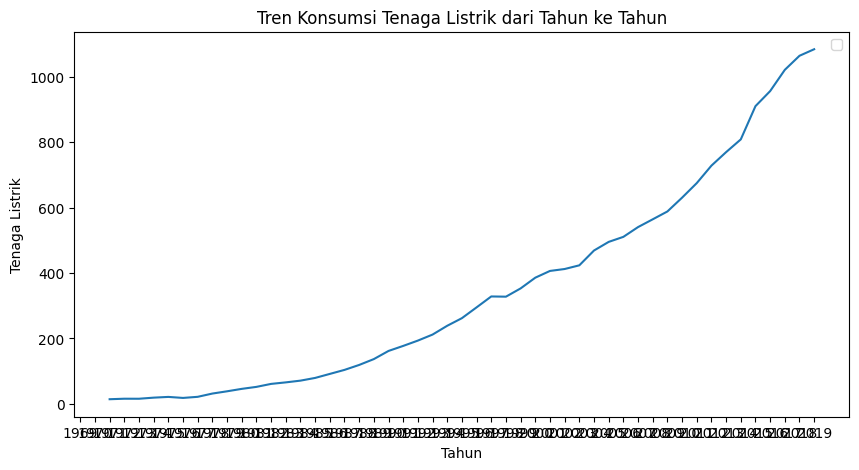

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_main['Year'], df_main['PowerConsumption'])
plt.xlabel('Tahun')
plt.ylabel('Tenaga Listrik')
plt.title('Tren Konsumsi Tenaga Listrik dari Tahun ke Tahun')
plt.legend()
plt.show()

Seperti di lihat pada Visualisasi grafik time series di atas dari tahun ke tahun komsumsi tenaga lisrik terus meningkat

## Kualitas Data

### Missing Value

Mencari missing value apakah ada missing value di data ini

In [32]:
print(df_main.isnull().sum())

df_main['PowerConsumption'] = df_main['PowerConsumption'].fillna(method='ffill')

Year                 0
PowerConsumption    11
dtype: int64


C:\Users\NikiR\AppData\Local\Temp\ipykernel_4264\3555172392.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_main['PowerConsumption'] = df_main['PowerConsumption'].fillna(method='ffill')


Bisa dilihat pada colom PowerConsumption menunjukan adanya missing value di data ini

### Outliers

Lalu, saya melakukan deteksi outlier, untuk memperbaiki kualitas data.

Menurut referensi yang didapat dari buku "Data Mining : Concept and Technique":

Link:
https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Local Outlier Factor (LOF) adalah metode deteksi outlier yang didasarkan pada kepadatan lokal suatu titik data dalam kaitannya dengan tetangga terdekatnya. Metode ini bertujuan untuk mengidentifikasi outlier lokal dengan membandingkan kepadatan lokal dari suatu titik dengan kepadatan lokal dari tetangga-tetangganya. Berikut adalah komponen utama dan langkah-langkah perhitungan dalam LOF:

#### 1. K-Tetangga Terdekat (K-Nearest Neighbors, K-NN)

- **Jarak K (k-distance)**: Jarak dari titik $ o $ ke tetangga terdekat ke-k.
  $$
  \text{k-distance}(o) = \text{dist}(o, o_k)
  $$
  di mana $ o_k $ adalah tetangga terdekat ke-k dari $ o $.

- **Lingkungan Jarak K (k-distance neighborhood)**: Himpunan titik-titik yang berada dalam jarak K dari $ o $.
  $$
  N_k(o) = \{ o' \mid \text{dist}(o, o') \leq \text{k-distance}(o) \}
  $$

#### 2. Jarak Jangkauan (Reachability Distance)

Jarak jangkauan dari titik $ o' $ ke titik $ o $ didefinisikan sebagai:
$$
\text{reachdist}_k(o', o) = \max(\text{k-distance}(o), \text{dist}(o', o))
$$

#### 3. Kepadatan Jangkauan Lokal (Local Reachability Density)

Kepadatan jangkauan lokal $ lrd_k(o) $ dari titik $ o $ adalah kebalikan dari rata-rata jarak jangkauan dari tetangga terdekatnya:
$$
lrd_k(o) = \frac{|N_k(o)|}{\sum_{o' \in N_k(o)} \text{reachdist}_k(o', o)}
$$

#### 4. Faktor Outlier Lokal (Local Outlier Factor)

Faktor outlier lokal $ LOF_k(o) $ dari titik $ o $ adalah rata-rata dari rasio kepadatan jangkauan lokal $ o $ terhadap kepadatan jangkauan lokal dari tetangga terdekatnya:
$$
LOF_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{|N_k(o)|}
$$

Data outlier sering kali mempengaruhi model data secara umum sehingga pengaruh dari data outlier tersebut harus dikurangi atau dihilangkan. Hal ini merujuk kepda https://ejurnal.its.ac.id/index.php/sains_seni/article/download/22520/3642

In [33]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

df_main = df_main.dropna(subset=['PowerConsumption'])

features = df_main[['PowerConsumption']].values

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

df_main['LOF_Score'] = lof.fit_predict(features)  # -1 untuk outlier, 1 untuk inlier
df_main['LOF_Value'] = -lof.negative_outlier_factor_  # Nilai LOF (semakin besar, semakin ekstrem)

outliers = df_main[df_main['LOF_Score'] == -1]
print("Data Outlier:\n", outliers)

print("DataFrame dengan Skor LOF:")
print(df_main.head())

Data Outlier:
     Year  PowerConsumption  LOF_Score  LOF_Value
57  2017            1021.0         -1   1.626322
58  2018            1064.0         -1   1.707245
59  2019            1084.0         -1   1.744950
DataFrame dengan Skor LOF:
    Year  PowerConsumption  LOF_Score  LOF_Value
11  1971         14.296924          1   0.988635
12  1972         15.834851          1   0.986796
13  1973         15.756674          1   0.986888
14  1974         19.109744          1   0.984552
15  1975         21.362178          1   0.983664


C:\Users\NikiR\AppData\Local\Temp\ipykernel_4264\4115913396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['LOF_Score'] = lof.fit_predict(features)  # -1 untuk outlier, 1 untuk inlier
C:\Users\NikiR\AppData\Local\Temp\ipykernel_4264\4115913396.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['LOF_Value'] = -lof.negative_outlier_factor_  # Nilai LOF (semakin besar, semakin ekstrem)


# DATA PREPROCESSING (PREPROSES DATA)

Pada data preprocessing kami akan memperbaiki kualitas data karena terdeteksi adanya missing value dan outlier pada data.

### Mengatasi Missing Value

Terlihat adanya missing value dan disini saya akan hapus missing value, terdapat 11 missing value

In [34]:
df_main = df_main.dropna()
df_main

,Year,PowerConsumption,LOF_Score,LOF_Value
11,1971,14.296924,1,0.988635
12,1972,15.834851,1,0.986796
13,1973,15.756674,1,0.986888
14,1974,19.109744,1,0.984552
15,1975,21.362178,1,0.983664
16,1976,18.257369,1,0.984887
17,1977,21.637652,1,0.983664
18,1978,31.617483,1,0.985857
19,1979,38.502185,1,0.988569
20,1980,45.945022,1,0.991501


### Mengatasi Outlier

Karena terdapat outlier di data ini oleh karena itu, 3 data ini akan dihapus yang memiliki nilai LOF -1. Setelah data di hapus data akan semakin berkualitas

In [35]:
df_main = df_main[df_main['LOF_Score'] != -1]

print("DataFrame setelah menghapus outlier:")
df_main

DataFrame setelah menghapus outlier:


,Year,PowerConsumption,LOF_Score,LOF_Value
11,1971,14.296924,1,0.988635
12,1972,15.834851,1,0.986796
13,1973,15.756674,1,0.986888
14,1974,19.109744,1,0.984552
15,1975,21.362178,1,0.983664
16,1976,18.257369,1,0.984887
17,1977,21.637652,1,0.983664
18,1978,31.617483,1,0.985857
19,1979,38.502185,1,0.988569
20,1980,45.945022,1,0.991501


## Membuat Sliding Windows


Sliding windows untuk membuat data time series ke supervies biar ada target jadi punya fitur dan target. Dengan sliding window, data diproses menjadi serangkaian input-output berurutan yang dapat digunakan untuk pelatihan model prediktif.

DataFrame supervised_df akan berisi kolom lag_1, lag_2, lag_3 sebagai fitur input dan PowerConsumption sebagai target.

In [36]:
def create_supervised_data(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

PowerConsumption_values = df_main['PowerConsumption'].values #df_cleaned

window_size = 3
X, y = create_supervised_data(PowerConsumption_values, window_size)

columns = [f'lag_{i+1}' for i in range(window_size)]  
supervised_df = pd.DataFrame(X, columns=columns)
supervised_df['PowerConsumption'] = y

supervised_df

,lag_1,lag_2,lag_3,PowerConsumption
0,14.296924,15.834851,15.756674,19.109744
1,15.834851,15.756674,19.109744,21.362178
2,15.756674,19.109744,21.362178,18.257369
3,19.109744,21.362178,18.257369,21.637652
4,21.362178,18.257369,21.637652,31.617483
5,18.257369,21.637652,31.617483,38.502185
6,21.637652,31.617483,38.502185,45.945022
7,31.617483,38.502185,45.945022,52.021824
8,38.502185,45.945022,52.021824,61.129176
9,45.945022,52.021824,61.129176,65.772151


Bisa dilihat di bawah adalah grafik visualisasi data supervised dari hasil sliding window, dengan menampilkan nilai lag (lag_1, lag_2, lag_3) dan nilai target (PowerConsumption).

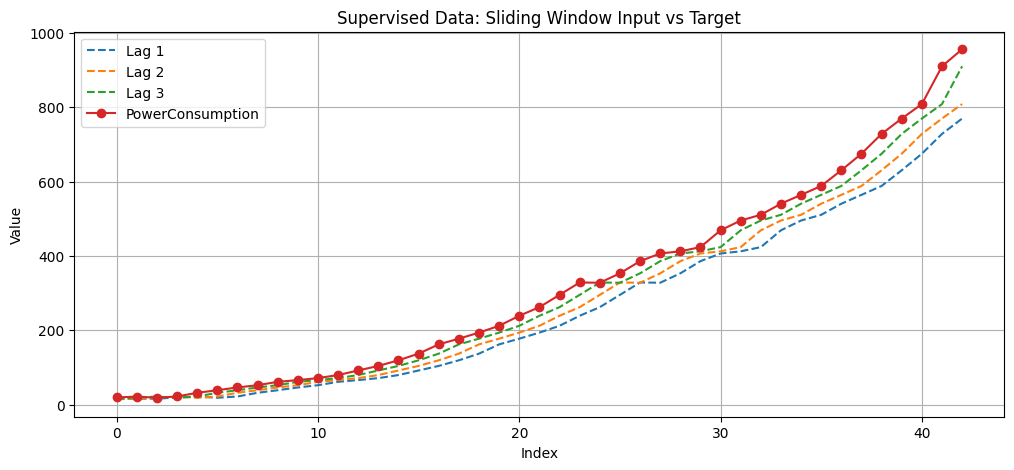

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(supervised_df['lag_1'], label='Lag 1', linestyle='--')
plt.plot(supervised_df['lag_2'], label='Lag 2', linestyle='--')
plt.plot(supervised_df['lag_3'], label='Lag 3', linestyle='--')
plt.plot(supervised_df['PowerConsumption'], label='PowerConsumption', marker='o')
plt.title('Supervised Data: Sliding Window Input vs Target')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Mengamati secara langsung data yang sudah di sliding windows mendeskripsikan langsung dari type data dari fitur dan target data

In [38]:
supervised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lag_1             43 non-null     float64
 1   lag_2             43 non-null     float64
 2   lag_3             43 non-null     float64
 3   PowerConsumption  43 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


## Normalisasi Data


Normalisasi data adalah teknik untuk mengubah skala data yang memiliki dimensi berbeda-beda menjadi skala yang seragam, yaitu antara 0–1

### MinMax Scaler

MinMax Scaler dilakukan agar rentang setiap sampel pada suatu fitur tidak terlalu besar.

Hasil Normalisasi dengan Min-Max Scaling:
      lag_1     lag_2     lag_3  PowerConsumption
0  0.000000  0.000099  0.000000          0.000909
1  0.002036  0.000000  0.003750          0.003311
2  0.001933  0.004230  0.006268          0.000000
3  0.006373  0.007072  0.002796          0.003605
4  0.009355  0.003155  0.006576          0.014247


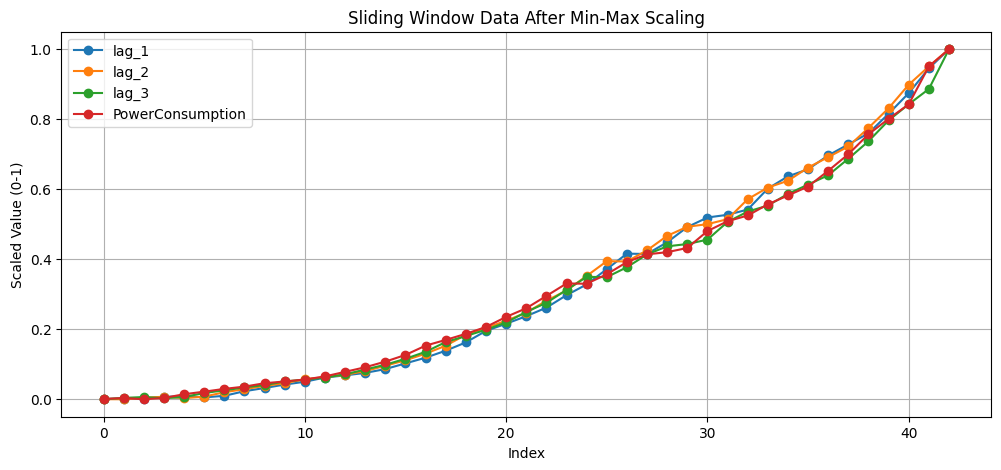

,lag_1,lag_2,lag_3,PowerConsumption
0,14.296924,15.834851,15.756674,19.109744
1,15.834851,15.756674,19.109744,21.362178
2,15.756674,19.109744,21.362178,18.257369
3,19.109744,21.362178,18.257369,21.637652
4,21.362178,18.257369,21.637652,31.617483
5,18.257369,21.637652,31.617483,38.502185
6,21.637652,31.617483,38.502185,45.945022
7,31.617483,38.502185,45.945022,52.021824
8,38.502185,45.945022,52.021824,61.129176
9,45.945022,52.021824,61.129176,65.772151


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(supervised_df)

data_scaled_df = pd.DataFrame(data_scaled, columns=supervised_df.columns)

print("Hasil Normalisasi dengan Min-Max Scaling:")
print(data_scaled_df.head())

plt.figure(figsize=(12, 5))
for column in data_scaled_df.columns:
    plt.plot(data_scaled_df.index, data_scaled_df[column], marker='o', label=column)

plt.title('Sliding Window Data After Min-Max Scaling')
plt.xlabel('Index')
plt.ylabel('Scaled Value (0-1)')
plt.legend()
plt.grid(True)
plt.show()

supervised_df


## Data Modelling

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore

- x: sebagai fitur
- y: sebagai target

In [41]:
X = supervised_df[['lag_1', 'lag_2', 'lag_3']].values
y = supervised_df['PowerConsumption'].values

- X_train: data latih
- X_test: data tes
- y_train: variabel latih
- y_test: variabel uji.

rule of thumb ad 5: 
- 90:10, 80:20, 70:30, 60:40 dan 50:50

menjadi rasio yang mendapatkan nilai eror terendah dari  RMSE, MSE, MAPE dan MAE
- 80:20, 70:30 dan 60:40

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Rumus RMSE

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum\_{i=1}^{n} \left( y_i - \hat{y}\_i \right)^2} $$

Keterangan:
RMSE = nilai root mean square error
- y  = nilai hasil observasi
- ŷ  = nilai hasil prediksi
- i  = urutan data pada database 
- n  = jumlah data

RMSE adalah:

- RMSE adalah standar deviasi dari residual
- RMSE menunjukkan kesalahan prediksi model rata-rata
- Nilai yang lebih rendah menunjukkan model yang lebih baik
- RMSE diukur dalam unit yang sama dengan variabel model

### Rumus MAPE

$$\text{MAPE} = \frac{100}{n} \times \sum \frac{\left|actual-forecast\right|}{actual}$$

Keterangan: MAPE = mean absolute percentage error 

- n  = jumlah data 
- y  = nilai hasil aktual
- ŷ  = nilai hasil pendugaan

Mean Absolut Percentage error (MAPE) adalah persentase kesalahan rata-rata secara mutlak (absolut). Pengertian Mean Absolute Percentage Error adalah Pengukuran statistik tentang akurasi perkiraan (prediksi) pada metode peramalan. Pengukuran dengan menggunakan Mean Absolute Percentage Error (MAPE) dapat digunakan oleh masyarakat luas karena MAPE mudah dipahami dan diterapkan dalam memprediksi akurasi peramalan. 

### Linear Regresi

teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui

regresi digunakan untuk memprediksi hubungan antar variabel, yaitu variabel dependen(terikat) dan independen. Variabel independen adalah variabel yang memberikan pengaruh, sedangkan variabel dependen adalah variabel yang dipengaruhi oleh variabel independen.


RMSE - Linear Regression: 9.6129
MAPE : 2.6075%


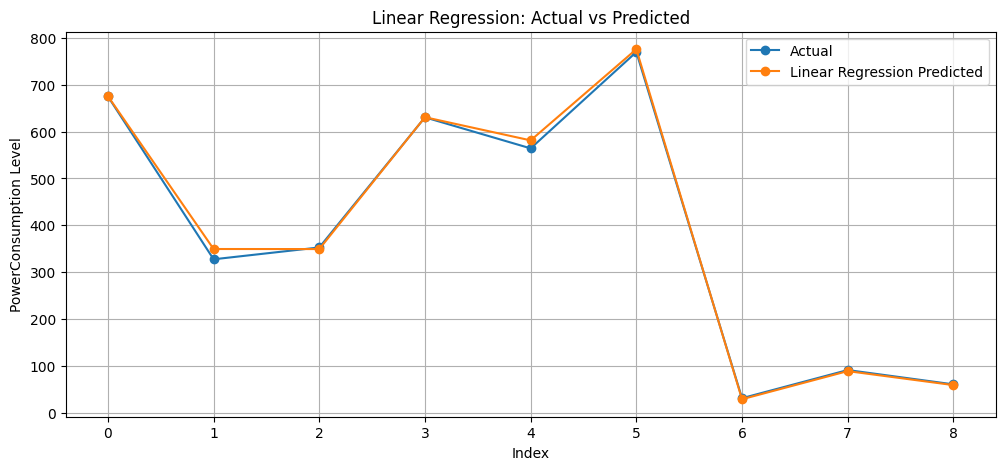

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE - Linear Regression: {rmse_lr:.4f}")

absolute_percentage_errors = np.abs((y_test - y_pred_lr) / y_test) * 100
mape_manual = np.mean(absolute_percentage_errors)
print(f"MAPE : {mape_manual:.4f}%")

plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_lr, label='Linear Regression Predicted', marker='o')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('PowerConsumption Level')
plt.legend()
plt.grid(True)
plt.show()


### SVR

untuk menemukan fungsi yang memperkirakan hubungan antara variabel input dan variabel target yang berkelanjutan sambil meminimalkan kesalahan prediksi

RMSE - SVR: 303.3294
MAPE - SVR: 144.3461%


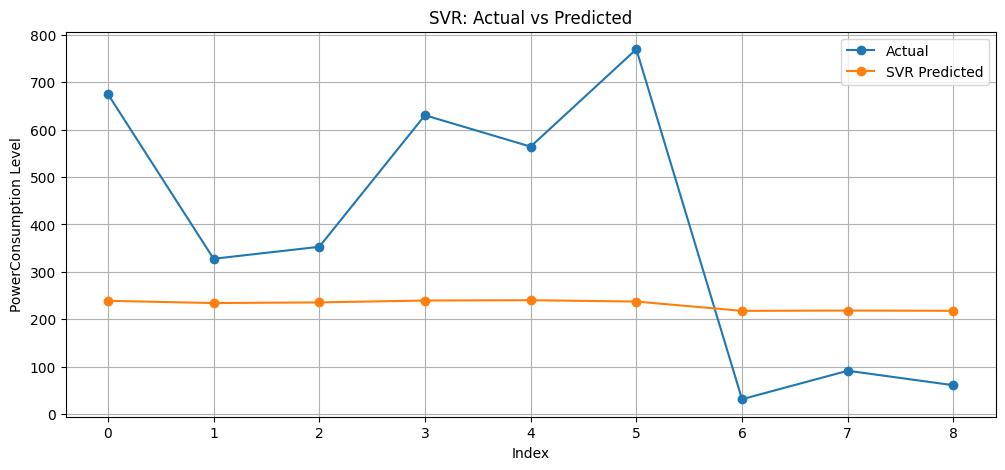

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"RMSE - SVR: {rmse_svr:.4f}")

absolute_percentage_errors_svr = np.abs((y_test - y_pred_svr) / y_test) * 100
mape_svr = np.mean(absolute_percentage_errors_svr)
print(f"MAPE - SVR: {mape_svr:.4f}%")

plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_svr, label='SVR Predicted', marker='o')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('PowerConsumption Level')
plt.legend()
plt.grid(True)
plt.show()


### LSTM

untuk membuat prediksi dan klasifikasi yang berhubungan dengan waktu. pengembangan Recurrent Neural Network 

Epoch 1/50


c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155748.8438  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 153032.2656 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160468.7344  
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158157.4531  
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157534.8438  
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154783.4375  
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151652.9219  
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148122.3438 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139237.6719  
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140837.6875  
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139333.2656  
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 130272.1172
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 125918.5938
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134473.7031  
Epoch 15/50
2/2 ━━━━━━━━━━━━

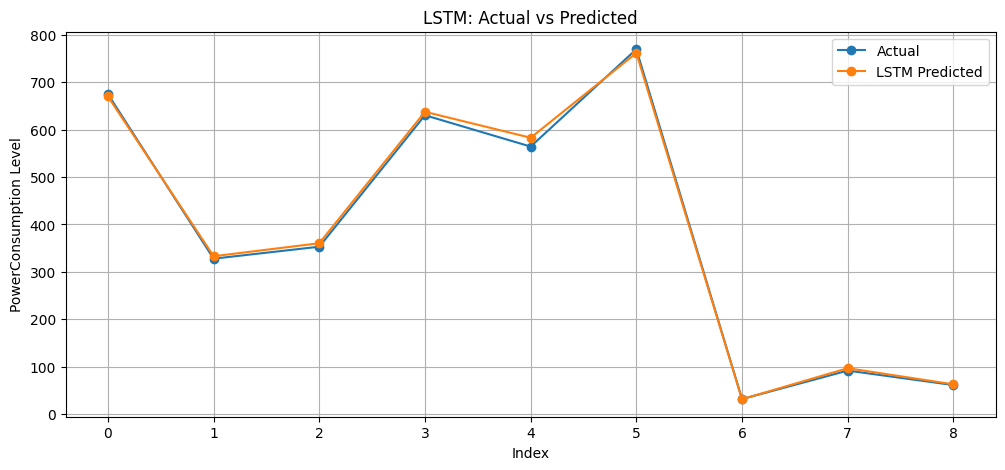

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Membentuk ulang data menjadi 3D untuk LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Melatih model
model.fit(X_train, y_train, epochs=50, verbose=1)

# Melakukan prediksi dengan model LSTM
y_pred_lstm = model.predict(X_test).flatten()

# Menghitung RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"RMSE - LSTM: {rmse_lstm:.4f}")

# Menghitung MAPE
absolute_percentage_errors_lstm = np.abs((y_test - y_pred_lstm) / y_test) * 100
mape_lstm = np.mean(absolute_percentage_errors_lstm)
print(f"MAPE - LSTM: {mape_lstm:.4f}%")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_lstm, label='LSTM Predicted', marker='o')
plt.title('LSTM: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('PowerConsumption Level')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
import sklearn
print(sklearn.__version__)

1.2.2


### Ensemble Bagging Dengan Linear dan SVR

Ensemble Bagging dengan Linear Regression, model regresi linier dilatih secara independen pada subset data yang berbeda, kemudian hasil prediksi dari model-model ini digabungkan untuk menghasilkan prediksi akhir

Ensemble Bagging dengan Support Vector Regression (SVR) adalah metode yang menggabungkan banyak model SVR untuk meningkatkan akurasi prediksi dan ketahanan terhadap noise atau outliers dalam data.

RMSE - Bagging Linear Regression: 10.3126
MAPE - Bagging Linear Regression: 2.8312%
RMSE - Bagging SVR: 295.3855
MAPE - Bagging SVR: 153.1421%


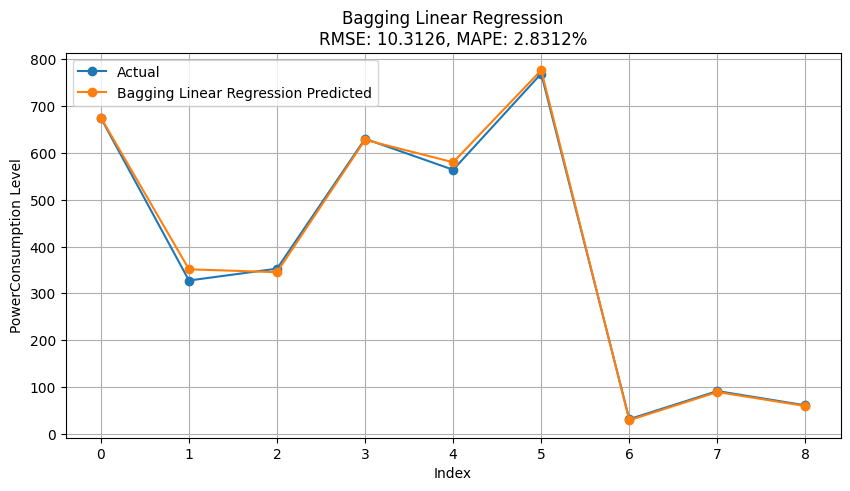

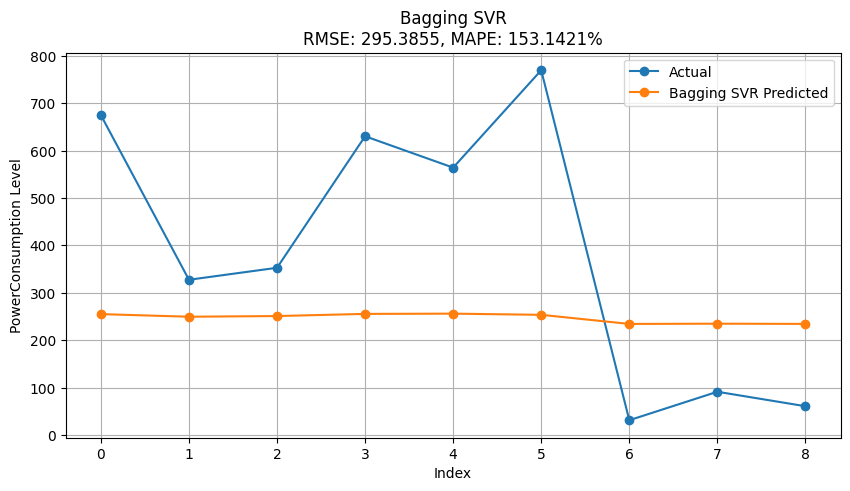

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Pastikan data dalam bentuk 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# 1. Bagging dengan Linear Regression
bagging_lr = BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_lr.fit(X_train_2d, y_train)
y_pred_lr = bagging_lr.predict(X_test_2d)

# Menghitung RMSE dan MAPE untuk Bagging Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
absolute_percentage_errors_lr = np.abs((y_test - y_pred_lr) / y_test) * 100
mape_lr = np.mean(absolute_percentage_errors_lr)
print(f"RMSE - Bagging Linear Regression: {rmse_lr:.4f}")
print(f"MAPE - Bagging Linear Regression: {mape_lr:.4f}%")

# 2. Bagging dengan SVR
bagging_svr = BaggingRegressor(estimator=SVR(kernel='rbf'), n_estimators=50, random_state=42)
bagging_svr.fit(X_train_2d, y_train)
y_pred_svr = bagging_svr.predict(X_test_2d)

# Menghitung RMSE dan MAPE untuk Bagging SVR
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
absolute_percentage_errors_svr = np.abs((y_test - y_pred_svr) / y_test) * 100
mape_svr = np.mean(absolute_percentage_errors_svr)
print(f"RMSE - Bagging SVR: {rmse_svr:.4f}")
print(f"MAPE - Bagging SVR: {mape_svr:.4f}%")

# Plot hasil prediksi vs aktual untuk Bagging Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_lr, label='Bagging Linear Regression Predicted', marker='o')
plt.title(f'Bagging Linear Regression\nRMSE: {rmse_lr:.4f}, MAPE: {mape_lr:.4f}%')
plt.xlabel('Index')
plt.ylabel('PowerConsumption Level')
plt.legend()
plt.grid(True)
plt.show()

# Plot hasil prediksi vs aktual untuk Bagging SVR
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_svr, label='Bagging SVR Predicted', marker='o')
plt.title(f'Bagging SVR\nRMSE: {rmse_svr:.4f}, MAPE: {mape_svr:.4f}%')
plt.xlabel('Index')
plt.ylabel('PowerConsumption Level')
plt.legend()
plt.grid(True)
plt.show()

# KESIMPULAN


Model Linear Regression adalh model terbaik untuk menenyatakan persentase kesalahan paling kecil

- Model yang memprediksi RMSE: 9.6129,      
MAPE: 2.6075% dengan Linear Regression

- Model yang memprediksi RMSE: 303.3294     
MAPE: 144.3461% dengan SVR

- Model yang memprediksi RMSE: 15.2530,     
MAPE: 3.6718% dengan LSTM

- Model yang memprediksi RMSE: 10.3126,     
MAPE: 2.8312% dengan Bagging Linear Regression

- Model yang memprediksi RMSE: 295.3855,    
MAPE: 153.1421% dengan Bagging SVR

# DEPLOYEMENT

In [48]:
import joblib

In [49]:
joblib.dump(lr_model, 'LR_model.joblib')

['LR_model.joblib']

# WEBSITE HASIL

https://huggingface.co/spaces/NikiRaihan/PSD-ELECTRIC-POWER-CONSUMPTION